# Benchmarking

In this exercise you will compare a few optimizers on estimagic's built-in benchmark suites. 

## Resources

- [Benchmarking tutorial](https://estimagic.readthedocs.io/en/stable/how_to_guides/optimization/how_to_benchmark_optimization_algorithms.html)
- [API reference](https://estimagic.readthedocs.io/en/stable/reference_guides/index.html#benchmarks)

In [1]:
import estimagic as em

In [2]:
problems = em.get_benchmark_problems(name="example")

In [3]:
optimizers = [
    "scipy_neldermead",
    "nlopt_lbfgs",
    "fides",
    "nag_dfols",
]

## Task 1:

- Use `em.run_benchmark` to run the benchmark.
- Use `em.profile_plot` to visualize the results.

## Solution 1:

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    results = em.run_benchmark(problems, optimize_options=optimizers)

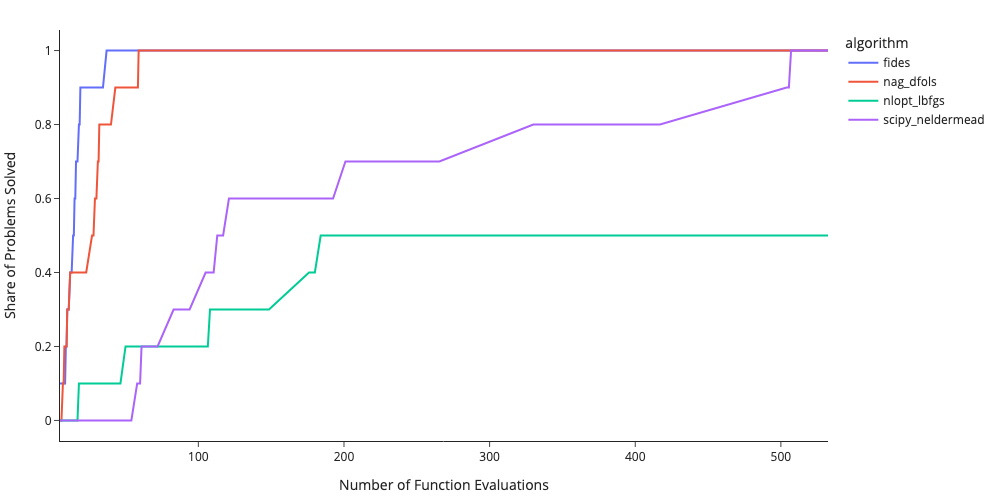

In [5]:
fig = em.profile_plot(problems, results)

fig.update_layout(width=1000, height=500)
fig.show(renderer="png")

## Task 2: 

- Switch to the `estimagic` problem set instead of the `example` problem set. Choose a suitable value for `n_cores` to parallelize on your laptop. Most laptops have at least 2 cores. You won't get any benefit from choosing more cores than you have. 
- Compare `scipy_neldermead` against `nlopt_neldermead`. Spoiler: They are very different!
- Use `em.convergence_plot` to look at individual problems.

In [6]:
problems = em.get_benchmark_problems(name="estimagic")

optimizers = ["scipy_neldermead", "nlopt_neldermead"]

In [7]:
results = em.run_benchmark(problems, optimize_options=optimizers, n_cores=2)

/Users/Tim_Mensinger/miniconda3/envs/scipy-estimagic/lib/python3.9/site-packages/estimagic/benchmarking/more_wild.py:198: RuntimeWarning: overflow encountered in exp
  temp_array[2] = np.exp(-x[6] * (temp - x[9]) ** 2)
/Users/Tim_Mensinger/miniconda3/envs/scipy-estimagic/lib/python3.9/site-packages/estimagic/benchmarking/more_wild.py:200: RuntimeWarning: overflow encountered in multiply
  fvec = y - (temp_array.T * x[:4]).T.sum(axis=0)
/Users/Tim_Mensinger/miniconda3/envs/scipy-estimagic/lib/python3.9/site-packages/estimagic/benchmarking/get_benchmark_problems.py:266: RuntimeWarning: overflow encountered in matmul
  "value": noisy_critval @ noisy_critval,
/Users/Tim_Mensinger/miniconda3/envs/scipy-estimagic/lib/python3.9/site-packages/estimagic/benchmarking/more_wild.py:198: RuntimeWarning: overflow encountered in exp
  temp_array[2] = np.exp(-x[6] * (temp - x[9]) ** 2)
/Users/Tim_Mensinger/miniconda3/envs/scipy-estimagic/lib/python3.9/site-packages/estimagic/benchmarking/more_wild.py:

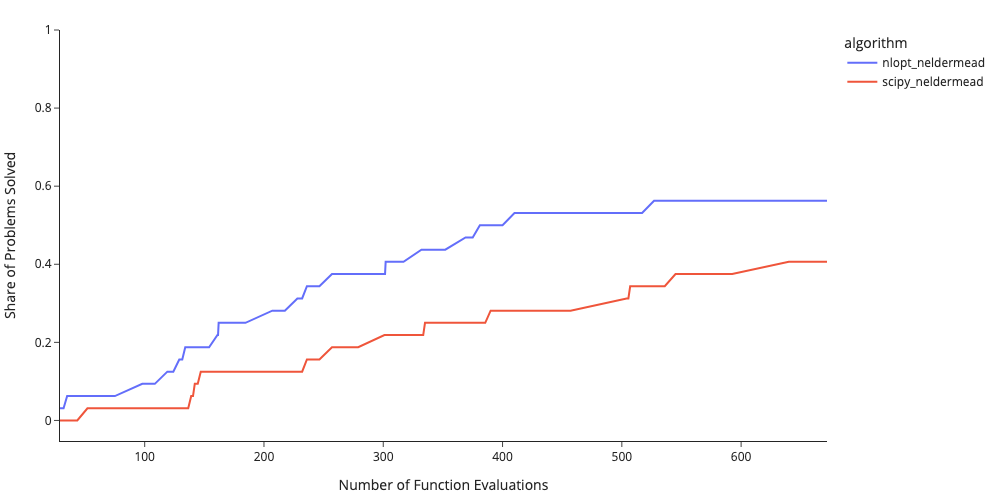

In [8]:
fig = em.profile_plot(problems, results)

fig.update_layout(width=1000, height=500)
fig.show(renderer="png")

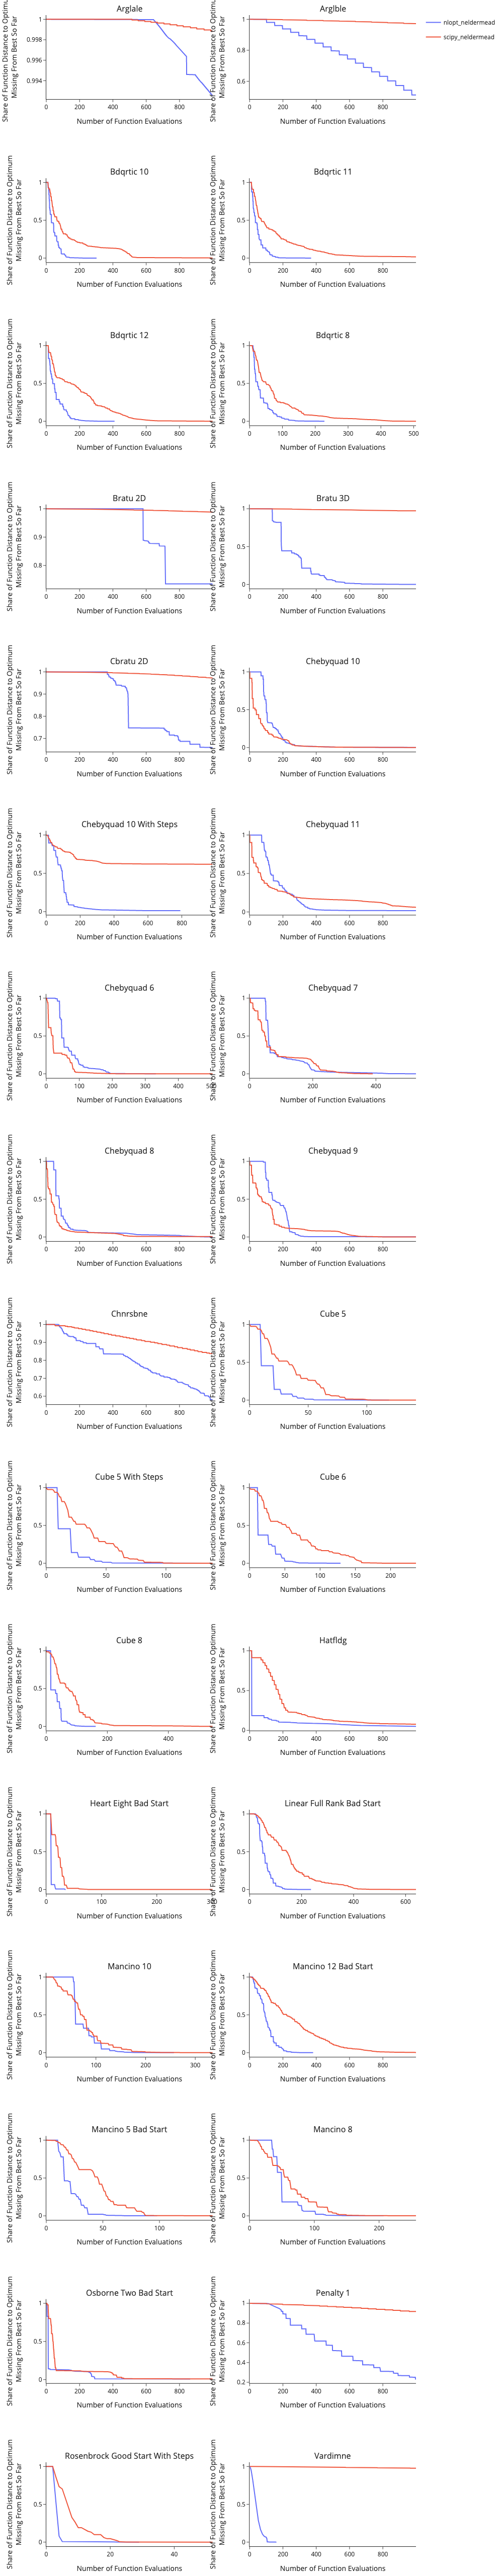

In [9]:
fig = em.convergence_plot(problems, results)

fig.show(renderer="png")